### Pricing with neural network in the Black-Scholes framework

In [25]:
import numpy as np 
import pandas as pd
from functions import *
from Neural_network_utils import NN_generator, ParamGenerator
from time import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
def dataset_generator(data):

    prices = np.empty((len(data), 1)) 
    S = np.empty((len(data), 1)) 
    
    for i in range(0, len(data)):
        
        T = data[i,0]
        sk = data[i,1] # Moneyness
        K = data[i,4] # Strike
        S[i] = K * sk
        r = data[i,2]
        sigma = data[i,3]
        

        prices[i,0] = Eurocall_Black_Scholes(S[i,0], K, r, 0, sigma, T)

    data2 = np.hstack((data, S, prices))
    df_data = pd.DataFrame(data=data2, columns=['maturity','S/K', 'r', 'sigma', 'strike', 'S', 'price'])
    
    return df_data

In [15]:
np.random.seed(42)

n = 20000

T_lb = 1/12
T_ub = 1 

sk_lb = .1
sk_ub = 2

sigma_lb = .01
sigma_ub = 1

K_lb = .01
K_ub = 100

r_lb = -.025
r_ub = .035

l_bounds = np.array([T_lb, sk_lb, r_lb, sigma_lb, K_lb])
u_bounds = np.array([T_ub, sk_ub, r_ub, sigma_ub, K_ub])

data = ParamGenerator(n, len(l_bounds), l_bounds, u_bounds)

In [16]:
start = time()

df_data = dataset_generator(data)

end = time()

print(f'Elapsed time: {round(end-start,4)}')

Elapsed time: 13.5374


In [17]:
df_data

,maturity,S/K,r,sigma,strike,S,price
0,0.994634,0.981640,-0.021998,0.058988,59.306168,58.217313,5.103816e-01
1,0.888397,1.695685,-0.023491,0.452110,71.745754,121.658209,5.066699e+01
2,0.639537,1.328965,0.032288,0.464938,76.644527,101.857859,3.051097e+01
3,0.868095,0.813076,0.026817,0.155801,94.387118,76.743915,5.973936e-01
4,0.938431,0.627266,-0.009120,0.036022,3.481044,2.183539,1.219732e-44
...,...,...,...,...,...,...,...
19995,0.202462,0.805153,0.004961,0.660189,29.162018,23.479898,1.054998e+00
19996,0.164260,0.473684,0.031230,0.409594,1.145175,0.542451,1.044099e-07
19997,0.492953,0.227230,0.033848,0.059767,67.582761,15.356861,8.614367e-269
19998,0.671560,0.890067,0.032039,0.970926,93.818957,83.505194,2.313380e+01


In [21]:
X = df_data.loc[:, ['maturity', 'sigma', 'S/K', 'r'] ]
X['S/K'] = X['S/K']
Y = df_data.iloc[:,-1]/df_data['strike']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) # dividing between train set and test set

In [22]:
# Build the model 

nNodes = 100
nLayers = 3
InputShape = len(X.columns)
BatchSize = 32
nEpochs = 200

model = NN_generator(InputShape, nLayers, nNodes, 'relu','mse','adam')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
start = time()

fitted_model = model.fit(x_train, y_train, epochs=nEpochs, batch_size=BatchSize, validation_split = 0.25, verbose = 1)

end = time()

print('Elapsed time : ' + str(end-start))

Epoch 1/200
352/352 [==============================] - 5s 10ms/step - loss: 0.0059 - val_loss: 3.4273e-05
Epoch 2/200
352/352 [==============================] - 3s 8ms/step - loss: 3.2186e-05 - val_loss: 1.6756e-05
Epoch 3/200
352/352 [==============================] - 3s 8ms/step - loss: 2.0045e-05 - val_loss: 9.7727e-06
Epoch 4/200
352/352 [==============================] - 3s 8ms/step - loss: 3.9577e-05 - val_loss: 5.0236e-05
Epoch 5/200
352/352 [==============================] - 3s 8ms/step - loss: 2.9974e-05 - val_loss: 1.5581e-05
Epoch 6/200
352/352 [==============================] - 3s 8ms/step - loss: 9.3440e-05 - val_loss: 1.1074e-05
Epoch 7/200
352/352 [==============================] - 3s 8ms/step - loss: 1.6524e-05 - val_loss: 6.9980e-06
Epoch 8/200
352/352 [==============================] - 3s 9ms/step - loss: 1.7647e-05 - val_loss: 1.3648e-04
Epoch 9/200
352/352 [==============================] - 3s 8ms/step - loss: 1.8828e-05 - val_loss: 2.0191e-05
Epoch 10/200
352/352 [

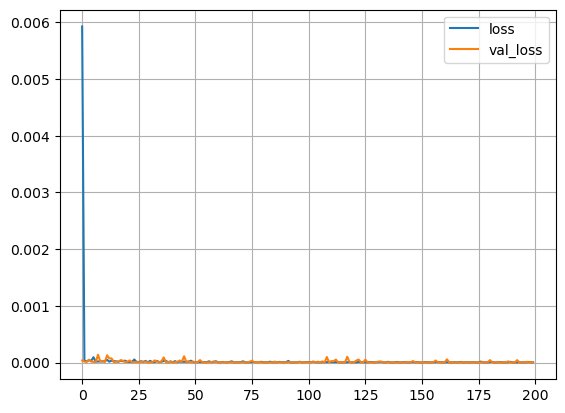

In [34]:
# plt.figure(figsize = (15,10))
plt.plot(fitted_model.history['loss'], label='loss')
plt.plot(fitted_model.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()


157/157 [==============================] - 1s 5ms/step


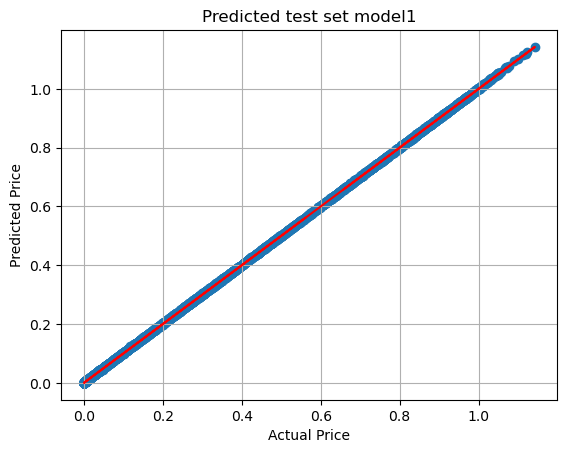

In [35]:
predictions = model.predict(x_test)

# plt.figure(figsize = (15,10))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot(y_test, y_test, 'r')
plt.grid(True)
plt.title('Predicted test set model1')
plt.show()